<a href="https://colab.research.google.com/github/Deepak-Data-Scientist-IIT/Loan-Prediction-Using-Deep-Learning-Project/blob/master/Solving_Loan_Prediction_using_Functional_API_in_keras_in_order_to_build_Sequential_architecture_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Loading the Dataset**

In [ ]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Load the preprocessed dataset Loan_prediction
data= pd.read_csv('Loan_prediction_data.csv')

In [ ]:
# Looking the first five rows of the dataset
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,0.0,0.000000,0.0,0.0,0.070489,0.000000,0.198860,0.74359,1.0,1.0,1.0
1,LP001003,0.0,1.0,0.333333,0.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0,0.0
2,LP001005,0.0,1.0,0.000000,0.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,1.0,1.0
3,LP001006,0.0,1.0,0.000000,1.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,1.0,1.0
4,LP001008,0.0,0.0,0.000000,0.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,1.0,1.0


In [ ]:
# Checking the missing values
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
# Checking the datatypes
data.dtypes

Loan_ID               object
Gender               float64
Married              float64
Dependents           float64
Education            float64
Self_Employed        float64
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area        float64
Loan_Status          float64
dtype: object

In [ ]:
# Removing the Loan_ID since these are just the unique value
data = data.drop('Loan_ID', axis=1)

In [ ]:
# Looking the shape of the data
data.shape

(614, 12)

In [ ]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,0.0,0.000000,0.0,0.0,0.070489,0.000000,0.198860,0.74359,1.0,1.0,1.0
1,0.0,1.0,0.333333,0.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0,0.0
2,0.0,1.0,0.000000,0.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,1.0,1.0
3,0.0,1.0,0.000000,1.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,1.0,1.0
4,0.0,0.0,0.000000,0.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,1.0,1.0


In [ ]:
# Seprating the independent and dependent variable
# Storing all the independent variable as X
X = data.drop('Loan_Status', axis=1)

# Storing the dependent variable as y
y = data['Loan_Status']

In [ ]:
# Shape of independent and dependent variable
X.shape, y.shape

((614, 11), (614,))

# **Creating Training and Validation Set**

In [ ]:
# Creating training and validation set

# Stratify will make sure that the distribution of classes in train and validation set it similar
# random state to generate the same train and validation set
# test size 0.2 will keep 20% data in validating and 80% in train set

X_train, X_test, y_train, y_test= train_test_split(X,y,stratify=data['Loan_Status'], random_state=10,
                                                   test_size=0.2)

In [ ]:
# Shape of training and validation set
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((491, 11), (491,)), ((123, 11), (123,)))

# **Define the Architecture of the model**

In [ ]:
# Importing keras
import keras
import tensorflow as tf
# Importing the sequential model
from keras.models import Sequential
# Importing differnt layers from keras
from keras.layers import InputLayer, Dense

In [ ]:
# Number of input Neurons
X_train.shape

(491, 11)

In [ ]:
# Number of feature in the data
X_train.shape[1]

11

In [ ]:
# Defininng the input neurons
input_neurons= X_train.shape[1]

# Define number of output neurons
output_neurons = 1

In [ ]:
# Define hidden layer and neurons in each layer
number_of_hidden_layers = 2
neuron_hidden_layer_1 = 10
neuron_hidden_layer_2 = 5

In [ ]:
# Defining the Architecture of the model
model = Sequential()
model.add(InputLayer(input_shape=(input_neurons,)))
model.add(Dense(units=neuron_hidden_layer_1, activation='relu'))
model.add(Dense(units=neuron_hidden_layer_2, activation='relu'))
model.add(Dense(units=output_neurons, activation='sigmoid'))

In [ ]:
# Summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                120       
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 6         
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras import Input, Model

In [ ]:
# Defining the architecture of the model using Functional API
x= Input(shape = (input_neurons,))
hidden1 = Dense(units=neuron_hidden_layer_1, activation='relu')(x)
hidden2 = Dense(units=neuron_hidden_layer_2, activation='relu')(hidden1)
output =  Dense(units=output_neurons, activation='sigmoid')(hidden2)

model_functional = Model(x, output)

In [ ]:
# Summary of the model
model_functional.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 11)]              0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                120       
_________________________________________________________________
dense_10 (Dense)             (None, 5)                 55        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 6         
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


# **Compiling the model(Defining loss function, optimizers)**

In [ ]:
# compiling the model

# loss as binary_crossentropy, since we have binary classification problem
# defining the optimizers as adam
# Evaluation metric as accuracy
model_functional.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# **Training the model**

In [ ]:
# Training the model
# passing the independent and dependent features for training set for training the model
# validation data will be evaluated at the end of the each epoch 
# setting the epoch as 50
# Storing the training model in model_history which will be used to visualize the training process
model_history= model_functional.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

Epoch 1/50
16/16 [==============================] - 0s 10ms/step - loss: 0.8062 - accuracy: 0.2607 - val_loss: 0.7530 - val_accuracy: 0.3496
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7490 - accuracy: 0.3462 - val_loss: 0.7015 - val_accuracy: 0.4634
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6999 - accuracy: 0.5703 - val_loss: 0.6565 - val_accuracy: 0.6504
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6601 - accuracy: 0.6741 - val_loss: 0.6282 - val_accuracy: 0.6911
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6369 - accuracy: 0.6884 - val_loss: 0.6139 - val_accuracy: 0.6911
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6249 - accuracy: 0.6864 - val_loss: 0.6070 - val_accuracy: 0.6911
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6168 - accuracy: 0.6864 - val_loss: 0.6022 - val_accuracy: 0.6911
Epoch 8/50
16/16 [=

# **Evaluating model performance on validation set**

In [ ]:
# getting prediction for the validation set
prediction = model_functional.predict(X_test)

In [ ]:
prediction = prediction.reshape(123,)

# Converting probabilites to classes
prediction_int = prediction >= 0.5
prediction_int = prediction_int.astype(np.int) 

In [ ]:
# calculating the accuracy on validation set
accuracy_score(y_test, prediction_int)

0.8130081300813008

# **Visualising the model performance**

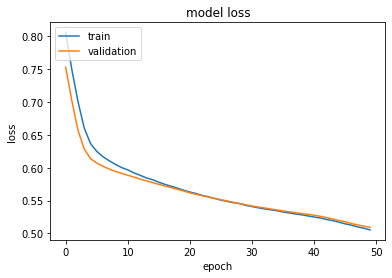

In [ ]:
# Summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()

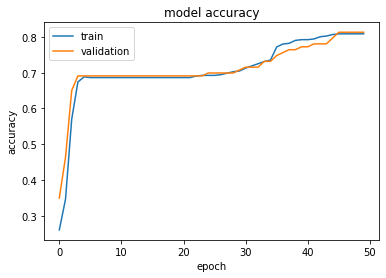

In [ ]:
# Summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()